In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

This notebook contains the semiquantitative simulation presented in Goesaert & Logman (2023) and supplements the theoretical explanation in the appendix.
For questions about the code or suggestions, please contact the authors.<br>
Wout Goesaert (first correspondent): wout.goesaert@gmail.com<br>
Paul Logman (second correspondent: Logman@physics.leidenuniv.nl

Define the amplitude distribution:

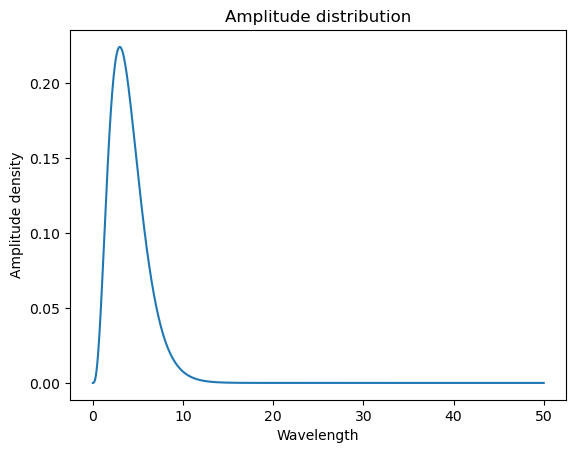

In [2]:
# A set of 2000 wavelengths and amplitudes are defined based
# on the gamma function. One could use a different smooth function
# that approaches zero at wavelength=0 zero and wavelength --> inf
# and has sufficient amplitude around the characteristic wavelength

wavelengthnumber = 1000
wavelengths = np.linspace(0.01,50,wavelengthnumber)
velocities = np.sqrt(2*np.pi/wavelengths) #surface tension=1, density=1
shape, scale = 4., 1.
amplitudes_gamma = wavelengths**(shape-1)\
                *(np.exp(-wavelengths/scale)/(gamma(shape)*scale**shape))

# We plot the gamma amplitude distribution:
plt.plot(wavelengths, amplitudes_gamma)
plt.title('Amplitude distribution')
plt.xlabel('Wavelength')
plt.ylabel('Amplitude density')
plt.show()

Single wavepackets simulation:

In [3]:
# We define 3 time steps at which to evaluate the situation:
t_0 = 0
t_1 = 5.5
t_2 = 18

# Variables such as stream velocity_stream and x_max
# are defined to produce images that are easier to understand
# (sufficient space between waves, sufficient resolution,...)
velocity_stream = 1.5
x_max = 55
x_positions_fig12 = np.linspace(0,x_max,1000)

# From the dispersion relation (eq. 2 in the paper), we then expect
# the following characteristic wavelength to move in tandem with
# the disturbance:
wavelength_char = 2*np.pi/(velocity_stream**2)
print('Characteristic wavelength expected to be: ' \
      + str("{:.3f}".format(wavelength_char)))

# The location of the disturbance at t_0 through t_2 are defined:
disturbance_point_0 = velocity_stream*t_0
disturbance_point_1 = velocity_stream*t_1
disturbance_point_2 = velocity_stream*t_2

# Stream profiles are initiated:
profile_w0_t0 = np.zeros(1000)
profile_w0_t1 = np.zeros(1000)
profile_w0_t2 = np.zeros(1000)
profile_w1_t1 = np.zeros(1000)
profile_w1_t2 = np.zeros(1000)
profile_w2_t2 = np.zeros(1000)

# We define delta peaks, which are just meant for illustrative
# purpose to represent the disturbance:
delta_w0 = np.zeros(1000)
delta_w0[int(1000/x_max*disturbance_point_0)] = 0.01
delta_w1 = np.zeros(1000)
delta_w1[int(1000/x_max*disturbance_point_1)] = 0.01
delta_w2 = np.zeros(1000)
delta_w2[int(1000/x_max*disturbance_point_2)] = 0.01

# The dispersed wave profiles are constructed by superposing
# the 1000 propagating waves at their own individual phase
# velocities according to the dispersion relation:
for n in range(wavelengthnumber):
    wave_0_t0 = amplitudes_gamma[n]*np.cos((2*np.pi/wavelengths[n])\
                *(x_positions_fig12-((t_0-t_0)*velocities[n])-disturbance_point_0))
    wave_0_t1 = amplitudes_gamma[n]*np.cos((2*np.pi/wavelengths[n])\
                *(x_positions_fig12-((t_1-t_0)*velocities[n])-disturbance_point_0))
    wave_0_t2 = amplitudes_gamma[n]*np.cos((2*np.pi/wavelengths[n])\
                *(x_positions_fig12-((t_2-t_0)*velocities[n])-disturbance_point_0))
    wave_1_t1 = amplitudes_gamma[n]*np.cos((2*np.pi/wavelengths[n])\
                *(x_positions_fig12-((t_1-t_1)*velocities[n])-disturbance_point_1))
    wave_1_t2 = amplitudes_gamma[n]*np.cos((2*np.pi/wavelengths[n])\
                *(x_positions_fig12-((t_2-t_1)*velocities[n])-disturbance_point_1))
    wave_2_t2 = amplitudes_gamma[n]*np.cos((2*np.pi/wavelengths[n])\
                *(x_positions_fig12-((t_2-t_2)*velocities[n])-disturbance_point_2))
    
    profile_w0_t0 += wave_0_t0
    profile_w0_t1 += wave_0_t1
    profile_w0_t2 += wave_0_t2
    profile_w1_t1 += wave_1_t1
    profile_w1_t2 += wave_1_t2
    profile_w2_t2 += wave_2_t2

Characteristic wavelength expected to be: 2.793


Single wavepackets figures:

Text(-0.013, 19.0, 'D')

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


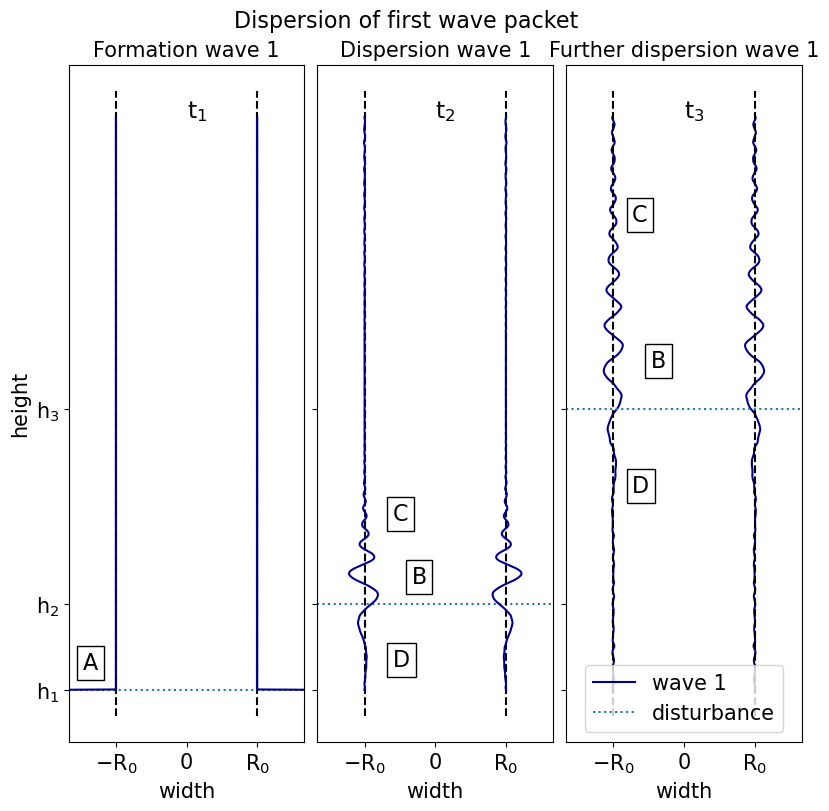

In [4]:
# We define a scalingfactor in the figures. This is
# just to make sure that the amplitude fits well within the figure.
# We are only interested in the relative amplitude of different wavelengths
scaling_fig12 = 8e3

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8)\
                                    , sharey=True, constrained_layout=True)
fig.suptitle('Dispersion of first wave packet',fontsize=16)

ax1.plot(delta_w0, x_positions_fig12, color = 'darkblue', zorder=0)
ax1.plot(-0.015-delta_w0, x_positions_fig12, color = 'darkblue', zorder=0)
ax1.vlines(0, 0, 55, color='darkblue', zorder=2)
ax1.vlines(-0.015, 0, 55, color='darkblue', zorder=2)
ax1.vlines(0, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax1.vlines(-0.015, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax1.hlines(disturbance_point_0, -0.02, 0.005, linestyle='dotted',zorder=-1)
ax1.set_title('Formation wave 1',fontsize=15)
ax1.set_xlim(-0.02, 0.005)
ax1.set_ylim(-5,60)
ax1.set_xlabel('width',fontsize=15)
ax1.set_ylabel('height',fontsize=15)
ax1.set_xticks([-0.015, -0.0075, 0])
ax1.set_xticklabels([r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"],fontsize=15)
ax1.set_yticks([disturbance_point_0, disturbance_point_1, disturbance_point_2])
ax1.set_yticklabels([r"$\mathrm{h_1}$", r"$\mathrm{h_2}$", r"$\mathrm{h_3}$"]\
                    ,fontsize=15)
ax1.text(-0.0075, max(x_positions_fig12), r'$t_1$', size=17)
ax1.text(-0.0185, disturbance_point_0+2, 'A', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)


ax2.plot(profile_w0_t1/scaling_fig12, x_positions_fig12, color = 'darkblue', zorder=2)
ax2.plot(-0.015-profile_w0_t1/scaling_fig12, x_positions_fig12, color = 'darkblue'\
         , zorder=2)
ax2.vlines(0, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax2.vlines(-0.015, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax2.hlines(disturbance_point_1, -0.02, 0.005, linestyle='dotted', zorder=-1)
ax2.set_title('Dispersion wave 1',fontsize=15)
ax2.set_xlim(-0.02, 0.005)
ax2.set_ylim(-5,60)
ax2.set_xlabel('width',fontsize=15)
ax2.set_xticks([-0.015, -0.0075, 0])
ax2.set_xticklabels([r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"],fontsize=15)
ax2.text(-0.0075, max(x_positions_fig12), r'$t_2$', size=17)
ax2.text(-0.010, disturbance_point_1+2, 'B', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)
ax2.text(-0.012, disturbance_point_1+8, 'C', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)
ax2.text(-0.012, disturbance_point_1-6, 'D', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)


ax3.plot(profile_w0_t2/scaling_fig12, x_positions_fig12, color='darkblue'\
        , label='wave 1')
ax3.plot(-0.015-profile_w0_t2/scaling_fig12, x_positions_fig12\
        , color='darkblue')
ax3.vlines(0, -2.5, 57.5, color='black', linestyle='dashed')
ax3.vlines(-0.015, -2.5, 57.5, color='black', linestyle='dashed')
ax3.hlines(disturbance_point_2, -0.02, 0.005, linestyle='dotted'\
        , label='disturbance')
ax3.set_title('Further dispersion wave 1',fontsize=15)
ax3.set_xlim(-0.02, 0.005)
ax3.set_ylim(-5,60)
ax3.set_xlabel('width',fontsize=15)
ax3.set_xticks([-0.015, -0.0075, 0])
ax3.set_xticklabels([r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"]\
                    ,fontsize=15)
ax3.legend(loc='lower center',fontsize=15)
ax3.text(-0.0075, max(x_positions_fig12), r'$t_3$', size=17)
ax3.text(-0.011, disturbance_point_2+4, 'B', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)
ax3.text(-0.013, disturbance_point_2+18, 'C', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)
ax3.text(-0.013, disturbance_point_2-8, 'D', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)

Text(-0.011, 26.0, 'H')

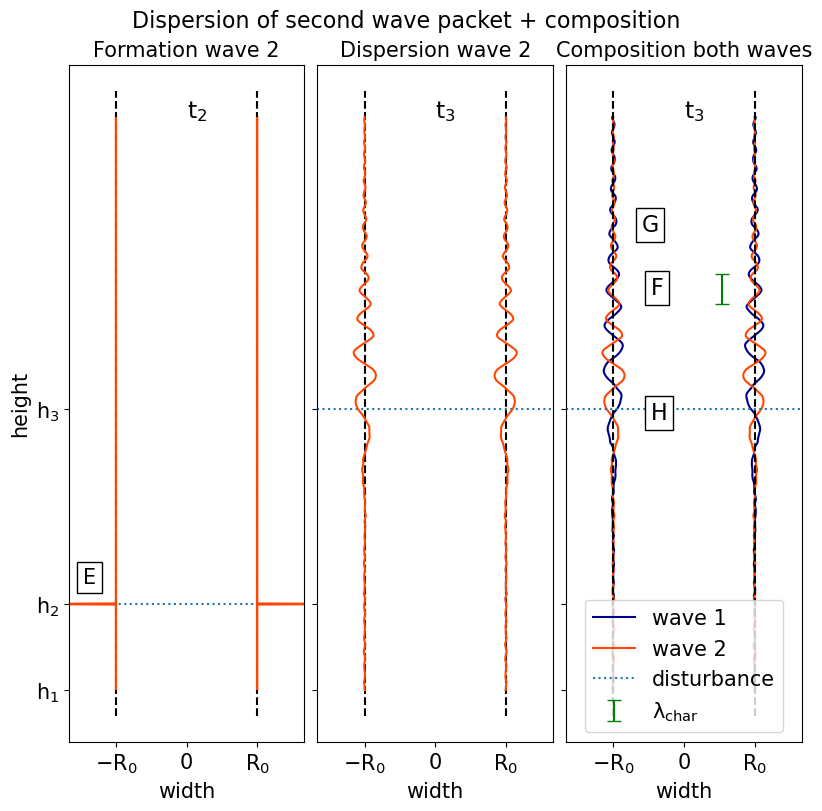

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8), sharey=True\
                                    , constrained_layout=True)
fig.suptitle('Dispersion of second wave packet + composition',fontsize=16)

ax1.plot(delta_w1, x_positions_fig12, color = 'orangered', zorder=0)
ax1.plot(-0.015-delta_w1, x_positions_fig12, color = 'orangered', zorder=0)
ax1.vlines(0, 0, 55, color='orangered', zorder=2)
ax1.vlines(-0.015, 0, 55, color='orangered', zorder=2)
ax1.vlines(0, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax1.vlines(-0.015, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax1.hlines(disturbance_point_1, -0.02, 0.005, linestyle='dotted',zorder=-1)
ax1.set_title('Formation wave 2',fontsize=15)
ax1.set_xlim(-0.02, 0.005)
ax1.set_ylim(-5,60)
ax1.set_xlabel('width',fontsize=15)
ax1.set_ylabel('height',fontsize=15)
ax1.set_xticks([-0.015, -0.0075, 0])
ax1.set_xticklabels([r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"],fontsize=15)
ax1.set_yticks([disturbance_point_0, disturbance_point_1, disturbance_point_2])
ax1.set_yticklabels([r"$\mathrm{h_1}$", r"$\mathrm{h_2}$", r"$\mathrm{h_3}$"]\
                    ,fontsize=15)
ax1.text(-0.0075, max(x_positions_fig12), r'$t_2$', size=17)
ax1.text(-0.0185, disturbance_point_1+2, 'E', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=15)

ax2.plot(profile_w1_t2/scaling_fig12, x_positions_fig12, color = 'orangered'\
         , zorder=2)
ax2.plot(-0.015-profile_w1_t2/scaling_fig12, x_positions_fig12\
         , color = 'orangered', zorder=2)
ax2.vlines(0, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax2.vlines(-0.015, -2.5, 57.5, color='black', linestyle='dashed', zorder=1)
ax2.hlines(disturbance_point_2, -0.02, 0.005, linestyle='dotted', zorder=-1)
ax2.set_title('Dispersion wave 2',fontsize=15)
ax2.set_xlim(-0.02, 0.005)
ax2.set_ylim(-5,60)
ax2.set_xlabel('width',fontsize=15)
ax2.set_xticks([-0.015, -0.0075, 0])
ax2.set_xticklabels([r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"],fontsize=15)
ax2.text(-0.0075, max(x_positions_fig12), r'$t_3$', size=17)

ax3.plot(profile_w0_t2/scaling_fig12, x_positions_fig12, color='darkblue'\
         , label='wave 1')
ax3.plot(-0.015-profile_w0_t2/scaling_fig12, x_positions_fig12, color='darkblue')
ax3.plot(profile_w1_t2/scaling_fig12, x_positions_fig12, color = 'orangered'\
         , zorder=2, label='wave 2')
ax3.plot(-0.015-profile_w1_t2/scaling_fig12, x_positions_fig12\
         , color = 'orangered', zorder=2)
ax3.errorbar([-0.0035], [38.5], yerr=[wavelength_char/2], capsize=5\
             , color='green', label=r'$\lambda_{char}$', fmt='.', markersize=0)
ax3.vlines(0, -2.5, 57.5, color='black', linestyle='dashed')
ax3.vlines(-0.015, -2.5, 57.5, color='black', linestyle='dashed')
ax3.hlines(disturbance_point_2, -0.02, 0.005, linestyle='dotted'\
           , label='disturbance')
ax3.set_title('Composition both waves',fontsize=15)
ax3.set_xlim(-0.02, 0.005)
ax3.set_ylim(-5,60)
ax3.set_xlabel('width',fontsize=15)
ax3.set_xticks([-0.015, -0.0075, 0])
ax3.set_xticklabels([r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"], fontsize=15)
ax3.legend(loc='lower center', fontsize=15)
ax3.text(-0.0075, max(x_positions_fig12), r'$t_3$', size=17)
ax3.text(-0.011, disturbance_point_2+11, 'F', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)
ax3.text(-0.012, disturbance_point_2+17, 'G', color='black'\
         , bbox=dict(facecolor='none', edgecolor='black'), size=16)
ax3.text(-0.011, disturbance_point_2-1, 'H', color='black'\
         , bbox=dict(facecolor='white', edgecolor='black'), size=16)

Wavepattern from interference of many wavepackets simulation:

In [6]:
# We now define 500 timesteps to simulate a
# close to continuous emission of waves:
t_array = np.linspace(-100,20,500)
x_positions_fig3 = np.linspace(20,65,1000)
profile_array_fig3 = np.zeros((len(t_array),1000))

# The disturbance point moves over time:
disturbance_point_array = velocity_stream*t_array

# Same as in the single wavepacket simulation but now
# We also add 500 wavepackets to the same profile
for n in range(wavelengthnumber):
    for i in range(len(t_array)):
        wave = amplitudes_gamma[n]\
        *np.cos((2*np.pi/wavelengths[n])\
        *(x_positions_fig3-((max(t_array)-t_array[i])\
        *velocities[n])-disturbance_point_array[i]))
        profile_array_fig3[i] += wave

profile_wavepattern_fig3 = np.sum(profile_array_fig3, axis=0)/len(t_array)

Wavepattern by wavepacket interference figure:

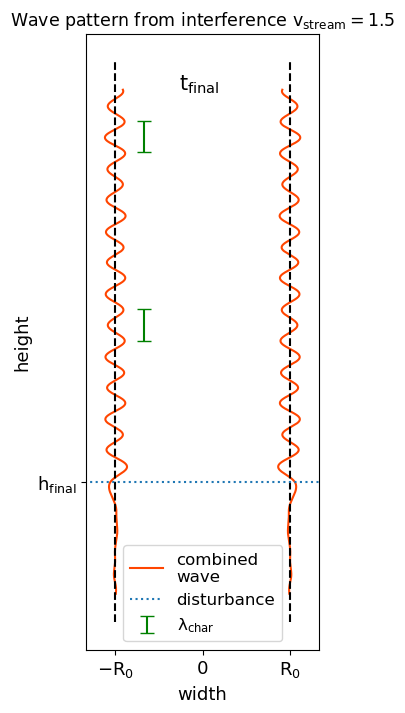

In [14]:
scalingfactor_fig3 = 2e4

plt.figure(figsize=[3,8])
plt.plot(profile_wavepattern_fig3*40/scalingfactor_fig3, x_positions_fig3\
         , label='combined\nwave', color='orangered')
plt.plot(-0.015-profile_wavepattern_fig3*40/scalingfactor_fig3\
         , x_positions_fig3, color='orangered')
plt.vlines(0, 17.5, 67.5, color='black', linestyle='dashed')
plt.vlines(-0.015, 17.5, 67.5, color='black', linestyle='dashed')
plt.errorbar([-0.0125], [44.0], yerr=[wavelength_char/2], capsize=5\
             , color='green', label=r'$\lambda_{char}$', fmt='.', markersize=0)
plt.errorbar([-0.0125], [60.8], yerr=[wavelength_char/2], capsize=5\
             , color='green', fmt='.', markersize=0)
plt.hlines(max(disturbance_point_array), -0.020, 0.005, linestyle='dotted'\
           , label='disturbance')
plt.title('Wave pattern from interference $v_{\mathrm{stream}}=1.5$'\
          , fontsize=12.5)
plt.xlim(-0.0175, 0.0025)
plt.text(-0.0095, max(x_positions_fig3), r'$t_{final}$', size=15)

plt.xlabel('width', fontsize=13)
plt.ylabel('height', fontsize=13)
plt.yticks([30],[r"$h_{final}$"], fontsize=13)
plt.xticks([-0.015, -0.0075, 0],[r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"]\
           , fontsize=13)
plt.legend(loc='lower center', fontsize=12)
plt.show()

But what if we choose a higher velocity than 1.5? Let's e.g. take v_stream=2

In [8]:
velocity_stream_2 = 2.
wavelength_char_2 = 2*np.pi/(velocity_stream_2**2)
print('Characteristic wavelength expected to be: ' \
      + str("{:.3f}".format(wavelength_char_2)))

Characteristic wavelength expected to be: 1.571


In [9]:
# We again define 500 timesteps to simulate a
# close to continuous emission of waves:
t_array = np.linspace(-100,20,500)
x_positions_fig4 = np.linspace(20,65,1000)
profile_array_fig4 = np.zeros((len(t_array), 1000))

# The disturbance point moves over time:
disturbance_point_array_fig4 = velocity_stream_2*t_array

# We again add 500 wavepackets to the same profile
for n in range(wavelengthnumber):
    for i in range(len(t_array)):
        wave = amplitudes_gamma[n]\
        *np.cos((2*np.pi/wavelengths[n])\
        *(x_positions_fig4-((max(t_array)-t_array[i])\
        *velocities[n])-disturbance_point_array_fig4[i]))
        profile_array_fig4[i] += wave

profile_wavepattern_fig4 = np.sum(profile_array_fig4, axis=0)/(len(t_array))

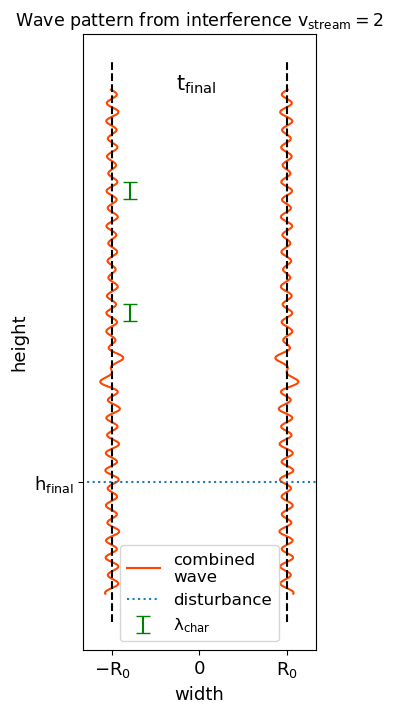

In [10]:
scalingfactor_fig4 = 8e3

plt.figure(figsize=[3,8])
plt.plot(profile_wavepattern_fig4*40/scalingfactor_fig4, x_positions_fig4\
         , label='combined\nwave', color='orangered')
plt.plot(-0.015-profile_wavepattern_fig4*40/scalingfactor_fig4\
         , x_positions_fig4, color='orangered')
plt.vlines(0, 17.5, 67.5, color='black', linestyle='dashed')
plt.vlines(-0.015, 17.5, 67.5, color='black', linestyle='dashed')
plt.errorbar([-0.0135], [45.1], yerr=[wavelength_char_2/2], capsize=5\
             , color='green', label=r'$\lambda_{char}$', fmt='.', markersize=0)
plt.errorbar([-0.0135], [56], yerr=[wavelength_char_2/2], capsize=5\
             , color='green', fmt='.', markersize=0)
plt.hlines(max(disturbance_point_array), -0.020, 0.005, linestyle='dotted'\
           , label='disturbance')
plt.title(r'Wave pattern from interference $v_{\mathrm{stream}}=2$'\
          , fontsize=12.5)
plt.xlim(-0.0175, 0.0025)
plt.text(-0.0095, max(x_positions_fig4), r'$t_{final}$', size=15)

plt.xlabel('width', fontsize=13)
plt.ylabel('height', fontsize=13)
plt.yticks([30],[r"$h_{final}$"], fontsize=13)
plt.xticks([-0.015, -0.0075, 0],[r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"]\
           , fontsize=13)
plt.legend(loc='lower center', fontsize=12)
plt.show()

But what if we choose a lower velocity than 1.5? Let's e.g. take v_stream=1

In [11]:
velocity_stream_3 = 1.
wavelength_char_3 = 2*np.pi/(velocity_stream_3**2)
print('Characteristic wavelength expected to be: ' \
      + str("{:.3f}".format(wavelength_char_3)))

Characteristic wavelength expected to be: 6.283


In [12]:
# We again define 500 timesteps to simulate a
# close to continuous emission of waves:
t_array = np.linspace(-100,20,500)
x_positions_fig5 = np.linspace(20,65,1000)
profile_array_fig5 = np.zeros((len(t_array), 1000))

# The disturbance point moves over time:
disturbance_point_array_fig5 = velocity_stream_3*t_array

# We again add 500 wavepackets to the same profile
for n in range(wavelengthnumber):
    for i in range(len(t_array)):
        wave = amplitudes_gamma[n]\
        *np.cos((2*np.pi/wavelengths[n])\
        *(x_positions_fig5-((max(t_array)-t_array[i])\
        *velocities[n])-disturbance_point_array_fig5[i]))
        profile_array_fig5[i] += wave

profile_wavepattern_fig5 = np.sum(profile_array_fig5, axis=0)/(len(t_array))

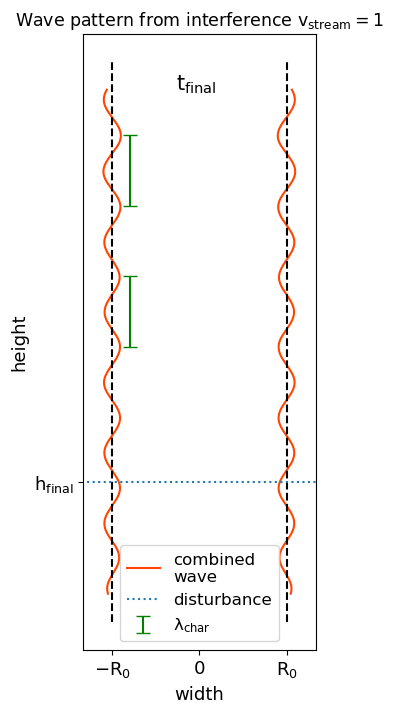

In [13]:
scalingfactor_fig5 = 6e4

plt.figure(figsize=[3,8])
plt.plot(profile_wavepattern_fig5*40/scalingfactor_fig5, x_positions_fig5\
         , label='combined\nwave', color='orangered')
plt.plot(-0.015-profile_wavepattern_fig5*40/scalingfactor_fig5\
         , x_positions_fig5, color='orangered')
plt.vlines(0, 17.5, 67.5, color='black', linestyle='dashed')
plt.vlines(-0.015, 17.5, 67.5, color='black', linestyle='dashed')
plt.errorbar([-0.0135], [45.2], yerr=[wavelength_char_3/2], capsize=5\
             , color='green', label=r'$\lambda_{char}$', fmt='.', markersize=0)
plt.errorbar([-0.0135], [57.8], yerr=[wavelength_char_3/2], capsize=5\
             , color='green', fmt='.', markersize=0)
plt.hlines(max(disturbance_point_array), -0.020, 0.005, linestyle='dotted'\
           , label='disturbance')
plt.title(r'Wave pattern from interference $v_{\mathrm{stream}}=1$'\
          , fontsize=12.5)
plt.xlim(-0.0175, 0.0025)
plt.text(-0.0095, max(x_positions_fig5), r'$t_{final}$', size=15)

plt.xlabel('width', fontsize=13)
plt.ylabel('height', fontsize=13)
plt.yticks([30],[r"$h_{final}$"], fontsize=13)
plt.xticks([-0.015, -0.0075, 0],[r"$-\mathrm{R_0}$", "0", r"$\mathrm{R_0}$"], fontsize=13)
plt.legend(loc='lower center', fontsize=12)
plt.show()

As one can see, increasing the stream velocity decreases the wavelength of the final wave pattern. Since the waves in the wave pattern all have a phase velocity that is equal to the upward velocity of the disturbance, this pattern remains stationary with respect to the disturbance. This is to say: it moves in tandem with the disturbance. If we now think instead of a stream of water falling with a constant velocity onto a stationary rod, we recover the effect of a wavepattern that looks "frozen" in place i.e. is stationary in the laboratory frame of reference.